<a href="https://colab.research.google.com/github/mohsina680/BuildablesDataScienceFellowship/blob/main/Task10_DS_FellowShip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression on Student Performance Dataset**

In [12]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load dataset
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
# Encode categorical variable (Yes/No -> 1/0)
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Features & Target
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)


In [18]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.082628398521853
R-squared: 0.9889832909573145


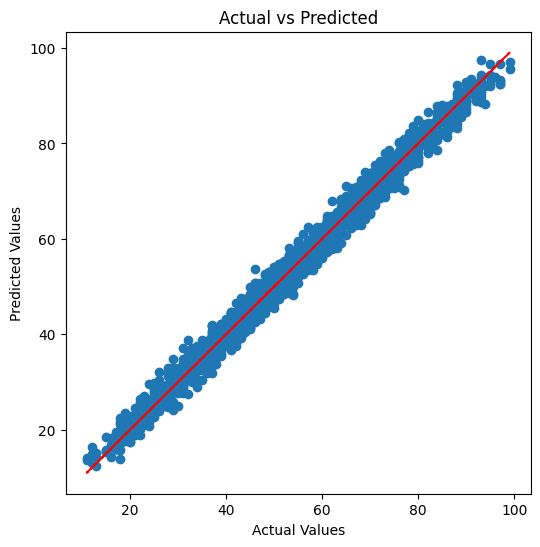

In [19]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.plot(y_test.values, y_test.values, color="red", linestyle="--")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

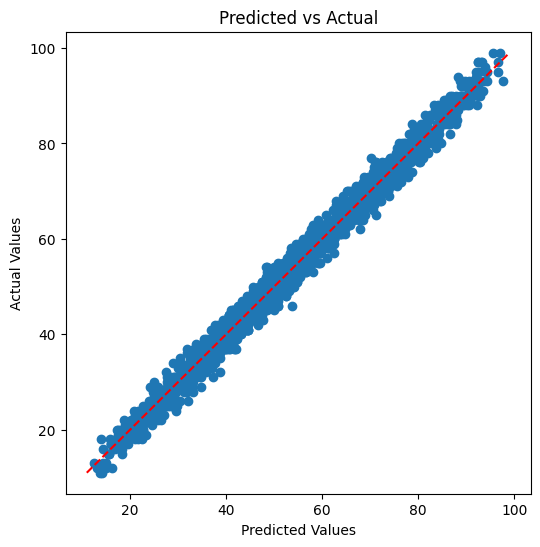

In [20]:

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual")
plt.show()

In [21]:
# Coefficients interpretation
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("Intercept:", model.intercept_)
coefficients

Intercept: -33.92194621555638


,Feature,Coefficient
0,Hours Studied,2.852484
1,Previous Scores,1.016988
2,Extracurricular Activities,0.608617
3,Sleep Hours,0.476941
4,Sample Question Papers Practiced,0.191831
